In [ ]:
#import tensorflow as tf ###
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver() ###
#tf.config.experimental_connect_to_cluster(tpu) ###
#tf.tpu.experimental.initialize_tpu_system(tpu) ###
#tpu_strategy = tf.distribute.TPUStrategy(tpu) ###

In [ ]:
(Xtrain_full, Ytrain_full), (Xtest, Ytest) = keras.datasets.fashion_mnist.load_data()

In [ ]:
seed = 42
keras.utils.set_random_seed(seed)
np.random.seed(seed)
Xtrain_full.shape

(60000, 28, 28)

In [ ]:
Xtrain, Xvalid = Xtrain_full[:-5000], Xtrain_full[-5000:]
Ytrain, Yvalid = Ytrain_full[:-5000], Ytrain_full[-5000:]


In [ ]:
# PyTorch nn.Sequential은 생성자 함수에 인자 여럿을 받음
#with tpu_strategy.scope(): ###
model = keras.models.Sequential([

  keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[28, 28, 1], activation="relu"),

  keras.layers.MaxPooling2D(pool_size=2),

  keras.layers.BatchNormalization(),

  keras.layers.Flatten(),

  keras.layers.Dense(units=32*11*11, activation="relu"),

  keras.layers.Dropout(0.3),

  keras.layers.Dense(units=10, activation="softmax")


])


In [ ]:
### compile 함수 호출이 tpu_strategy scope 안으로 재배치하기
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

history = model.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xvalid, Yvalid))
model.evaluate(Xtest, Ytest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 32)       128       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 3872)              0         
                                                                 
 dense_2 (Dense)             (None, 3872)              14996256  
                                                                 
 dropout_1 (Dropout)         (None, 3872)             

[0.32136669754981995, 0.9157000184059143]

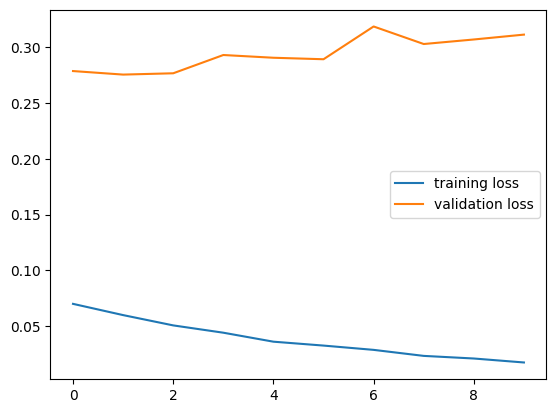

In [ ]:
_, ax = plt.subplots()
ax.plot(history.history["loss"], label="training loss")
ax.plot(history.history["val_loss"], label="validation loss")
ax.legend()
plt.show()

In [ ]:
# PyTorch nn.Sequential은 생성자 함수에 인자 여럿을 받음
#with tpu_strategy.scope(): ###
model_fc = keras.models.Sequential([
  # keras.layers.InputLayer(),

  keras.layers.Flatten(),

  keras.layers.Dense(units=1024, activation="relu"),

  keras.layers.BatchNormalization(),

  keras.layers.Dropout(0.3),

  keras.layers.Dense(units=256, activation="relu"),

  keras.layers.Dropout(0.3),

  keras.layers.Dense(units=10, activation="softmax")


])


In [ ]:
### compile 함수 호출이 tpu_strategy scope 안으로 재배치됨
model_fc.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_fc.build((None, 28, 28, 1))
model_fc.summary()
# 파라미터 갯수를 보고
# 파라미터 효율을 따져보자
# 좋은 성능을 내기 위해 얼만큼 더 많은 파라미터를 쓸 준비가
# 나는 되어있는지 -> 하드웨어, 시간, 비용 등


history_fc = model_fc.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xvalid, Yvalid))
model_fc.evaluate(Xtest, Ytest)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 1024)              803840    
                                                                 
 batch_normalization_7 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_20 (Dense)            (None, 256)               262400    
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                      

[0.4217885136604309, 0.8726000189781189]

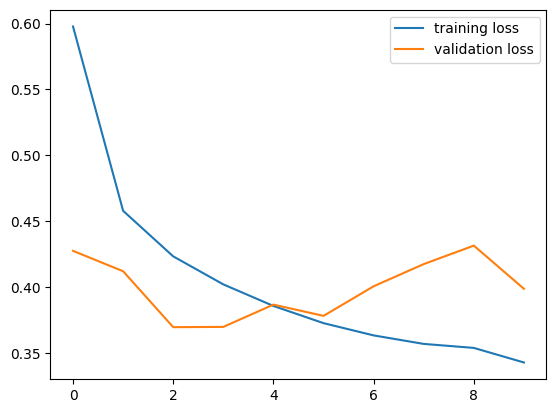

In [ ]:
_, ax = plt.subplots()
ax.plot(history_fc.history["loss"], label="training loss")
ax.plot(history_fc.history["val_loss"], label="validation loss")
ax.legend()
plt.show()